<a href="https://colab.research.google.com/github/IsmayilGasim/ML-Book/blob/main/ML_Book_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn.datasets import fetch_openml

In [28]:
mnist = fetch_openml('mnist_784',as_frame=False)

X, y = mnist.data, mnist.target

OpenMLError: Dataset with data_id 554 not found.

In [33]:
import pandas as pd

!curl -L -o mnist-784.zip https://www.kaggle.com/api/v1/datasets/download/aadeshkoirala/mnist-784

!unzip /content/mnist-784.zip

df = pd.read_csv('/content/mnist_784.csv')

X = df.drop(['class'], axis=1).values
y = df['class'].copy().values

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15.2M  100 15.2M    0     0  61.0M      0 --:--:-- --:--:-- --:--:-- 61.0M
Archive:  /content/mnist-784.zip
replace mnist_784.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mnist_784.csv           


In [34]:
y


array([5, 0, 4, ..., 4, 5, 6])

In [35]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
X.shape

(70000, 784)

In [37]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [38]:
y.shape

(70000,)

In [39]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

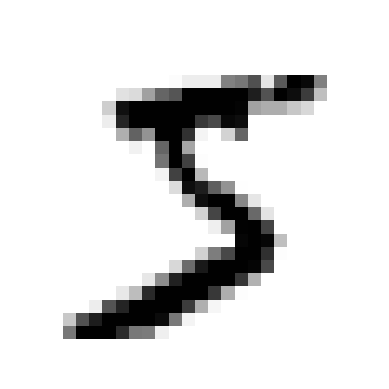

In [40]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
  image = image_data.reshape(28,28)
  plt.imshow(image, cmap='binary')
  plt.axis('off')

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [41]:
y[0]

np.int64(5)

In [54]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [61]:
y_train_5 = (y_train == 5)

In [62]:
y_test_5 = (y_test == 5)

In [63]:
y_train

array([5, 0, 4, ..., 5, 6, 8])

In [65]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

array([ True])

In [66]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5,cv=3, scoring='accuracy' )

array([0.95035, 0.96035, 0.9604 ])

In [68]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

cross_val_score(dummy_clf,X_train, y_train_5, cv=3, scoring='accuracy' )

False


array([0.90965, 0.90965, 0.90965])

In [69]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train, y_train_5, cv=3 )

y_train_pred

array([ True, False, False, ...,  True, False, False])

In [70]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)

cm

array([[53892,   687],
       [ 1891,  3530]])

In [74]:
from sklearn.metrics import  recall_score, precision_score, f1_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [72]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [75]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [76]:
y_scores = sgd_clf.decision_function([some_digit])

In [77]:
y_scores

array([2164.22030239])

In [80]:
threshold = 0
y_some_digit_predict = (y_scores>threshold)
y_some_digit_predict

array([ True])

In [81]:
threshold = 3000
y_some_digit_predict = (y_scores>threshold)
y_some_digit_predict

array([False])

In [82]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [83]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [84]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

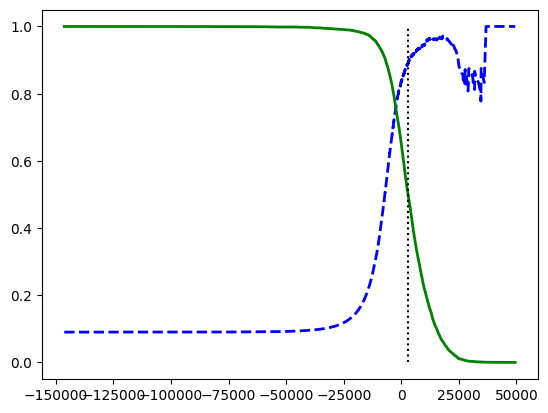

In [86]:
plt.plot(thresholds, precisions[:-1], "b--",label="Precision",linewidth=2 )
plt.plot(thresholds, recalls[:-1], "g-",label="Recall",linewidth=2 )
plt.vlines(threshold, 0 , 1.0,"k", "dotted", label="threshold")
plt.show()

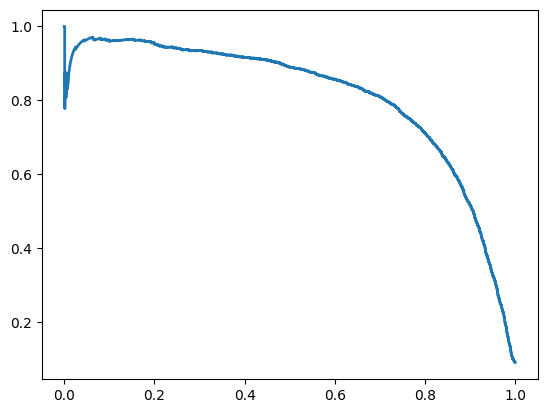

In [87]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.show()

In [90]:
precisions

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

In [94]:
idx_for_90_precision = (precisions >= 0.90).argmax()
idx_for_90_precision

np.int64(57109)

In [96]:
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(3370.0194991439557)

In [98]:
y_train_pred_90 = (y_scores>=threshold_for_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [99]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [100]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706